# Lab 8

Majo Gil - 20337
Joshua Chicoj - 20566

In [4]:
import gensim
import re
# !pip install Cython

## Preprocesamiento de datos

In [5]:
def clean_text(line):
    # Remove dates
    line = re.sub(r'[A-Za-z]{3} \d{1,2} \d{4}\s+', '', line)
    # Replace tab and newline characters
    line = line.replace('\t', ' ').replace('\n', '')
    # Remove non-ASCII characters
    line = re.sub(r'[^\x00-\x7F]+', '', line)
    # Remove lines or parts with excessive ?
    line = re.sub(r'\?{4,}', '', line)
    return line.strip()

with open('./data/reviews_data.txt', 'r', encoding='utf-8', errors='replace') as file:
    content = file.readlines()
    
    # Apply the cleaning function to each line
    documents = [clean_text(line) for line in content if clean_text(line)]

documents[0:10]

["Nice trendy hotel location not too bad. I stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites in Beijing, then you

In [6]:
clean_corpus = [gensim.utils.simple_preprocess(document) for document in documents]
clean_corpus[0:5]

[['nice',
  'trendy',
  'hotel',
  'location',
  'not',
  'too',
  'bad',
  'stayed',
  'in',
  'this',
  'hotel',
  'for',
  'one',
  'night',
  'as',
  'this',
  'is',
  'fairly',
  'new',
  'place',
  'some',
  'of',
  'the',
  'taxi',
  'drivers',
  'did',
  'not',
  'know',
  'where',
  'it',
  'was',
  'and',
  'or',
  'did',
  'not',
  'want',
  'to',
  'drive',
  'there',
  'once',
  'have',
  'eventually',
  'arrived',
  'at',
  'the',
  'hotel',
  'was',
  'very',
  'pleasantly',
  'surprised',
  'with',
  'the',
  'decor',
  'of',
  'the',
  'lobby',
  'ground',
  'floor',
  'area',
  'it',
  'was',
  'very',
  'stylish',
  'and',
  'modern',
  'found',
  'the',
  'reception',
  'staff',
  'geeting',
  'me',
  'with',
  'aloha',
  'bit',
  'out',
  'of',
  'place',
  'but',
  'guess',
  'they',
  'are',
  'briefed',
  'to',
  'say',
  'that',
  'to',
  'keep',
  'up',
  'the',
  'coroporate',
  'image',
  'as',
  'have',
  'starwood',
  'preferred',
  'guest',
  'member',
  

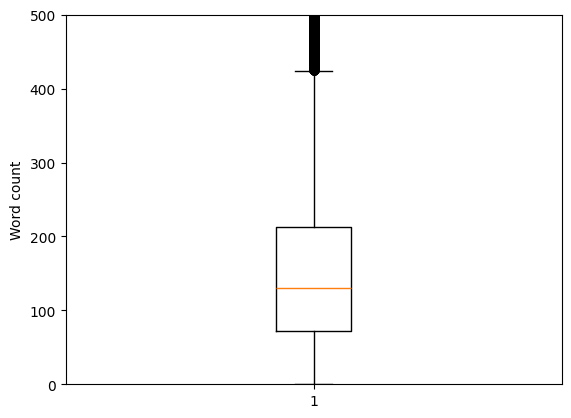

In [7]:
import matplotlib.pyplot as plt

word_lengths = [len(document) for document in clean_corpus]
plt.boxplot(word_lengths)
plt.ylim(0, 500)
plt.ylabel('Word count')
plt.show()

In [8]:
len(clean_corpus)

254648

## Creación del modelo

In [18]:
model = gensim.models.Word2Vec(
    clean_corpus, 
    vector_size=200, 
    window=50, 
    min_count=1, 
    workers=15
)

model.train(clean_corpus, total_examples=len(clean_corpus), epochs=5)

(150761946, 206324095)

## Visualización de embeddings

In [19]:
import numpy as np

control_words = ['street', 'good', 'dog', 'mother', 'bed']
embeddings = np.zeros(shape=(55, 200))
words = []
index = 0

for word in control_words:
    similar_words = model.wv.most_similar(word, topn=10)
    embeddings[index] = model.wv[word]
    words.append(word)
    
    for similar_word in similar_words:
        index += 1
        embeddings[index] = model.wv[similar_word[0]]
        words.append(similar_word[0])
        
    index += 1
    
words = np.array(words)
words

array(['street', 'road', 'st', 'streets', 'steet', 'rue', 'airspace',
       'hosptital', 'hampsteadvery', 'thoroughfare', 'intersection',
       'good', 'decent', 'great', 'excellent', 'nice', 'ok', 'reasonable',
       'poor', 'exellent', 'wise', 'limited', 'dog', 'dogs', 'pet',
       'pets', 'kennel', 'cats', 'pup', 'puppy', 'animals', 'terrier',
       'barking', 'mother', 'mom', 'niece', 'daughter', 'mum', 'cousin',
       'granddaughter', 'sister', 'friend', 'sisters', 'daughters', 'bed',
       'beds', 'mattress', 'matress', 'bedding', 'duvet', 'room',
       'pillows', 'sofabed', 'cushion', 'chair'], dtype='<U13')

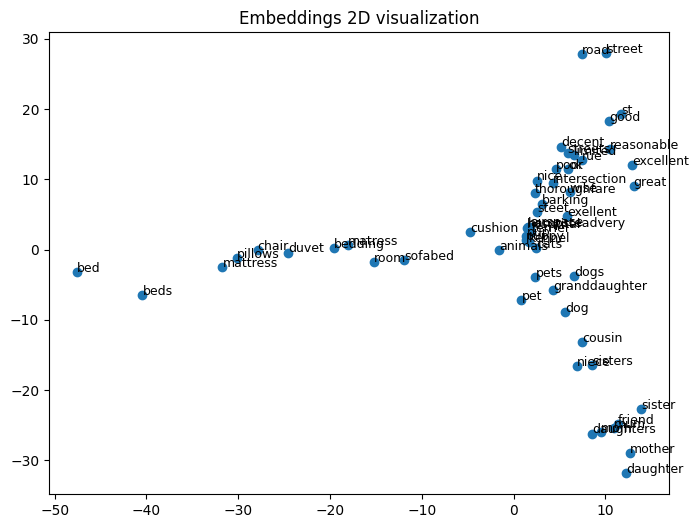

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(embeddings)


plt.figure(figsize=(8,6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('Embeddings 2D visualization')

for i in range(len(transformed_data)):
    plt.text(transformed_data[i, 0] + 0.02, transformed_data[i, 1] + 0.02, str(words[i]), fontsize=9)

plt.show()

## Preguntas de teoría

Los parámetros vector_size y window influyen de manera importante en el comportamiento de los embeddings. vector_size es el encargado de indicar al algoritmo el tamaño de los vectores a utilizar al generar los embeddings y el parámetro window le indica al modelo la cantidad de palabras a utilizar para contextualizar determinada palabra. Utilizar altas dimensiones para el parámetro vector_size, no solo causa un aumento en el tiempo de procesamiento, sino que también puede ocasionar overfitting en el modelo, ocasionando una falta de generalización. Por otro lado, un vector_size grande puede contribuir a la captura de relaciones más sutiles, aumentando la posibilidad de detectar analogías. Considerando el caso contrario en el que vector_size es pequeño, este puede aumentar la eficiencia de los embeddings sacrificando eficiencia, por lo que ejecutar tareas que requieran de mayor comprensión de los textos se verán afectadas.

Ahora bien, cuando el parámetro window toma parámetros grandes, este puede ayudar a encontrar relaciones globales, por lo que permite contextualizar las palabras tomando en cuenta el tema completo del corpus analizado. Sin embargo, no todo es bueno, pues se estarían sacrificando las relaciones sintácticas entre las palabras, por lo que las relaciones locales se perderían y se estaría añadiendo una gran cantidad de ruido al embedding. Por otro lado, asignar un valor bajo al parámetro window ayudaría a encontrar mayores relaciones sintácticas, entendiendo de mejor manera la relación gramatical de cada palabra dentro del corpus. Sin embargo, se estarían sacrificando las relaciones semánticas dentro del corpus, por lo que para tareas que requieran de mayor comprensión del texto se verían afectadas.

Es por esto que se recomienda la utilización de valores altos en vector_size y window cuando el objetivo del embedding es realizar análisis más profundos del corpus, como analogías o traducciones de idiomas en los cuales el significado de una palabra depende del contexto. En contraste, se recomienda la utilización de valores bajos para vector_size y window cuando el objetivo es analizar la estructura gramatical del texto, haciendo más sencilla la identificación de errores comunes de escritura.